In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['font.size']=18

In [2]:
import numpy as np

In [3]:
x1 = np.array([[1], [0]])
x2 = np.array([[0], [1]])

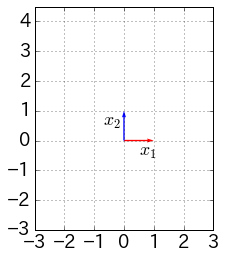

In [4]:
# ベクトルを描画
plt.quiver(0, 0, np.hstack((x1, x2))[0, :], np.hstack((x1, x2))[1, :],
          color=['red', 'blue'], angles='xy', scale_units='xy', scale=1)
plt.text(0.5, -0.5, '${x}_{1}$')
plt.text(-0.7, 0.5, '${x}_{2}$')

# 軸の範囲
plt.xlim(-3,3)
plt.ylim(-3,4.5)
# 軸の目盛りを設定
plt.xticks(np.arange(-3,3.1,1))
plt.yticks(np.arange(-3,4.1,1))
plt.grid()
ax = plt.gca()

ax.set(adjustable='box-forced', aspect='equal')
plt.show()

In [5]:
A = np.array([[1, 1], [-2, 4]])
y1, y2 = A.dot(x1), A.dot(x2)
print(y1)
print(y2)


[[ 1]
 [-2]]
[[1]
 [4]]


In [6]:
y = A.dot(np.hstack((x1, x2)))
print(y)

[[ 1  1]
 [-2  4]]


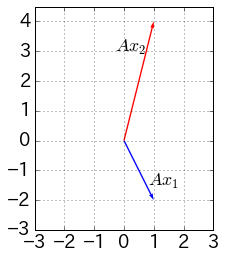

In [7]:
fig = plt.figure()
plt.quiver(0, 0, np.hstack((y1, y2))[0, :], np.hstack((y1, y2))[1, :],
          color={'red', 'blue'}, angles='xy', scale_units='xy', scale=1)
plt.text(0.8, -1.5, '$A{x}_{1}$')
plt.text(-0.3, 3.0, '$A{x}_{2}$')
plt.xlim(-3,3)
plt.ylim(-3,4.5)
plt.xticks(np.arange(-3, 3.1, 1))
plt.yticks(np.arange(-3, 4.1, 1))
plt.grid()
ax = fig.gca()
ax.set(adjustable='box-forced', aspect='equal')
plt.show()


# 固有ベクトル：行列をかけても向きが変化しないベクトル

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in arccos
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


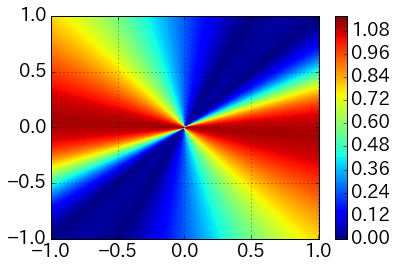

In [8]:
# -1から1まで0.005刻みでグリッドポイントを作成
x, y = np.meshgrid(np.arange(-1, 1.01, 0.005), np.arange(-1, 1.01, 0.005))
# x,yともに１次元配列には直して行方向に結合した後に行列Aをかける（写像）
xx, yy = A.dot(np.vstack((x.ravel(), y.ravel())))
# 元のベクトルの長さ（配列）
norm_orig = np.sqrt(x.ravel()**2 + y.ravel()**2)
# 像（ベクトル）の長さ（配列）
norm_mapped = np.sqrt(xx**2 + yy**2)
# ベクトルの内積（配列）
inner_prod = xx * x.ravel() + yy * y.ravel()
# ベクトルの間の角度（配列）
theta = np.arccos(inner_prod / (norm_orig * norm_mapped))
# 0.01刻みで表示する色を変化させる
interval = np.arange(0,max(theta) + 0.05, 0.01)
# 等高線図をプロット
plt.contourf(x, y, theta.reshape(x.shape), interval)
# カラーバーを表示
plt.colorbar()
plt.grid()
plt.show()


In [9]:
eigval_A, eigvec_A = np.linalg.eig(A)
print(eigval_A) # 固有値
print(eigvec_A) # 固有ベクトル

[ 2.  3.]
[[-0.70710678 -0.4472136 ]
 [-0.70710678 -0.89442719]]


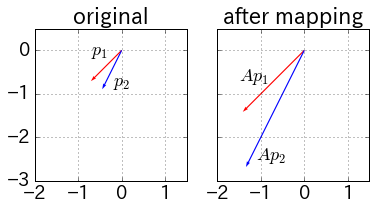

In [10]:

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax[0].quiver(0, 0, eigvec_A[0, :], eigvec_A[1, :], color=['red', 'blue'],
            angles='xy', scale_units='xy', scale=1)
ax[0].text(-0.7, -0.1, '${p}_{1}$')
ax[0].text(-0.2, -0.8, '${p}_{2}$')
ax[0].set_xlim(-2, 1.5)
ax[0].set_ylim(-3,0.5)
ax[0].set_xticks(np.arange(-2, 1.1, 1))
ax[0].set_yticks(np.arange(-3, 0.1, 1))
ax[0].set_title('original')
ax[0].set(adjustable='box-forced', aspect='equal')
ax[0].grid()

ax[1].quiver(0, 0, eigval_A * eigvec_A[0, :], eigval_A * eigvec_A[1, :], color=['red', 'blue'],
            angles='xy', scale_units='xy', scale=1)
ax[1].text(-1.5, -0.7, '$A{p}_{1}$')
ax[1].text(-1.1, -2.5, '$A{p}_{2}$')
ax[1].set_title('after mapping')
ax[1].set(adjustable='box-forced', aspect='equal')
ax[1].grid()
plt.show()


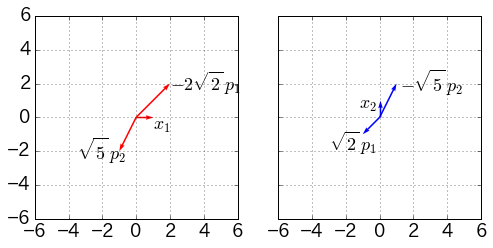

In [37]:
x1 = np.array([[1], [0]])
x2 = np.array([[0], [1]])

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,8))
coeff1 = np.array([-2*np.sqrt(2), np.sqrt(5)])
ax[0].quiver(x1[0, 0], x1[1, 0], color='red', angles='xy', scale_units='xy', scale=1)
ax[0].quiver(0, 0, coeff1 * eigvec_A[0, :], coeff1 * eigvec_A[1, :], color='red',angles='xy', scale_units='xy', scale=1)
ax[0].text(1.0, -0.7, '${x}_{1}$', fontsize = 18)
ax[0].text(2.0, 1.6, '$-2\sqrt{2} \, {p}_{1}$', fontsize=18)
ax[0].text(-3.5, -2.5, '$\sqrt{5} \, {p}_{2}$', fontsize=18)
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(-6, 6)
ax[0].set_xticks(np.arange(-6, 6.1, 2))
ax[0].set_yticks(np.arange(-6, 6.1, 2))
ax[0].grid()
ax[0].set(adjustable='box-forced', aspect='equal')
coeff2 = np.array([np.sqrt(2), -np.sqrt(5)]) # 固有ベクトルの係数
ax[1].quiver(x2[0, 0], x2[1,0], color='blue', angles='xy', scale_units='xy', scale=1)
ax[1].quiver(0, 0, coeff2 * eigvec_A[0, :], coeff2 * eigvec_A[1, :], color='blue',
            angles='xy', scale_units='xy', scale=1)
ax[1].text(-1.2, 0.5, '${x}_{2}$', fontsize=18)
ax[1].text(-3.0, -2.0, '$\sqrt{2} \, {p}_{1}$', fontsize=18)
ax[1].text(1.2, 1.5, '$-\sqrt{5} \, {p}_{2}$', fontsize=18)
ax[1].set(adjustable='box-forced', aspect='equal')
ax[1].grid()
plt.show()

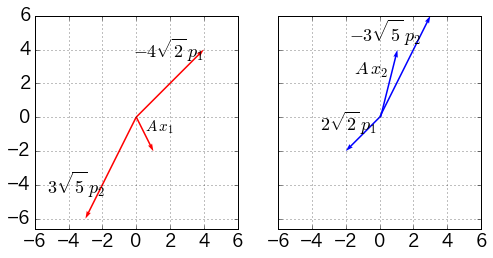

In [47]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,8))
# ベクトルx1の各成分の行列Aによる像
x1_comp_mapped = A.dot(coeff1 * eigvec_A)
ax[0].quiver(y1[0, :], y1[1, :], color='red', angles='xy', scale_units='xy', scale=1)
ax[0].quiver(0,0, x1_comp_mapped[0, :], x1_comp_mapped[1,:], color='red', angles='xy', scale_units='xy', scale=1)
ax[0].text(0.5, -0.8, '$A \, {x}_{1}$', fontsize = 15)
ax[0].text(-0.2, 3.5, '$-4\sqrt{2} \, {p}_{1}$')
ax[0].text(-5.3, -4.5, '$3\sqrt{5} \, {p}_{2}$')
ax[0].set_xlim(-6,6)
ax[0].set_ylim(-6.6)
ax[0].set_xticks(np.arange(-6, 6.1,2))
ax[0].set_yticks(np.arange(-6,6.1,2))
ax[0].set(adjustable='box-forced', aspect='equal')
ax[0].grid()

# ベクトルx2の各成分の行列Aによる像
x2_comp_mapped = A.dot(coeff2 * eigvec_A)
ax[1].quiver(y2[0, :], y2[1, :], color='blue', angles='xy', scale_units='xy', scale=1)
ax[1].quiver(0, 0, x2_comp_mapped[0, :], x2_comp_mapped[1, :], color='blue', angles='xy', scale_units = 'xy', scale=1)
ax[1].text(-1.5, 2.5, '$A \, {x}_{2}$')
ax[1].text(-3.5, -0.8, '$2\sqrt{2} \, {p}_{1}$')
ax[1].text(-1.8, 4.5, '$-3\sqrt{5} \, {p}_{2}$')
ax[0].set_ylim(-6.6)
ax[1].set(adjustable='box-forced', aspect='equal')
ax[1].grid()
plt.show()


# 行列の階数（ランク）

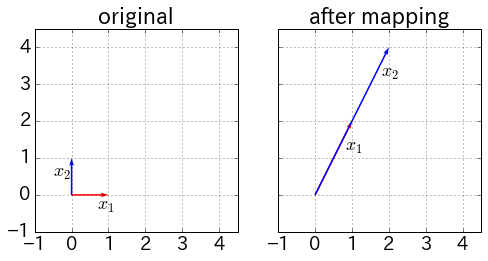

In [30]:
x1 = np.array([[1], [0]])
x2 = np.array([[0], [1]])
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,8))
ax[0].quiver(0, 0, np.hstack((x1, x2))[0, :], np.hstack((x1, x2))[1, :], color=['red', 'blue'], angles='xy', scale_units='xy', scale=1)

ax[0].text(0.7, -0.4, '$x_1$')
ax[0].text(-0.5, 0.5, '$x_2$')
ax[0].grid()
ax[0].set_title('original')
ax[0].set_xlim(-1, 4.5)
ax[0].set_ylim(-1, 4.5)
ax[0].set_xticks(np.arange(-1,4.1,1))
ax[0].set_yticks(np.arange(-1,4.1,1))
ax[0].set(adjustable='box-forced', aspect='equal')

ax[1].quiver(0, 0, [1,2], [2,4], color=['red', 'blue'], angles='xy', scale_units='xy', scale=1)
ax[1].text(0.8, 1.2, '$x_1$')
ax[1].text(1.8, 3.2, '$x_2$')
ax[1].grid()
ax[1].set(adjustable='box-forced', aspect='equal')
ax[1].set_title('after mapping')
plt.show()


In [31]:
B = np.array([[1,2], [2,4]])
eigval_B, eigvec_B = np.linalg.eig(B)
print(eigval_B)
print(eigvec_B)

[ 0.  5.]
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


In [32]:
eigval_B, eigvec_B = np.linalg.eigh(B)
print(eigval_B)
print(eigvec_B)

[ 0.  5.]
[[-0.89442719  0.4472136 ]
 [ 0.4472136   0.89442719]]


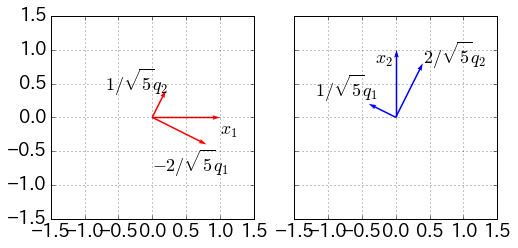

In [35]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,8))
coeff1 = np.array([-2/np.sqrt(5), 1/np.sqrt(5)])
ax[0].quiver(1, 0, color=['red'], angles='xy', scale_units='xy', scale=1)
ax[0].quiver(0, 0, coeff1*eigvec_B[0,:],coeff1*eigvec_B[1,:],color=['red'], angles='xy', scale_units='xy', scale=1)

ax[0].text(1.0, -0.25, '$x_1$')
ax[0].text(0.0, -0.8, '$-2/\sqrt{5} q_1$')
ax[0].text(-0.7, 0.4, '$1/\sqrt{5} q_2$')

ax[0].set_xlim(-1.5, 1.5)
ax[0].set_ylim(-1.5, 1.5)
ax[0].grid()
ax[0].set(adjustable='box-forced', aspect='equal')

coeff2 = np.array([1/np.sqrt(5), 2/np.sqrt(5)])
eigvec_B_mapped = A.dot(eigvec_B)
ax[1].quiver(0, 1, color=['blue'], angles='xy', scale_units='xy', scale=1)
ax[1].quiver(0, 0, coeff2 * eigvec_B[0, :], coeff2 * eigvec_B[1, :], color=['blue'], angles='xy', scale_units='xy', scale=1)

ax[1].text(-0.3, 0.8, '$x_2$')
ax[1].text(-1.2, 0.3, '$1/\sqrt{5} q_1$')
ax[1].text(0.4, 0.8, '$2/\sqrt{5} q_2$')

ax[1].grid()
ax[1].set(adjustable='box-forced', aspect='equal')

plt.show()